In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
df.drop(columns='id',inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dtypes=df.dtypes
n_uniq=df.nunique()
pd.DataFrame({"Dtypes":dtypes,"Num_Uniqe":n_uniq}).T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Dtypes,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Num_Uniqe,2,456,479,522,539,474,537,537,542,432,...,457,511,514,544,411,529,539,492,500,535


In [ ]:
col=['diagnosis']
df[col]=df[col].astype("category")
pd.DataFrame(df.dtypes).T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,category,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [ ]:
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({"Null":null,"Ratio":ratio}).T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


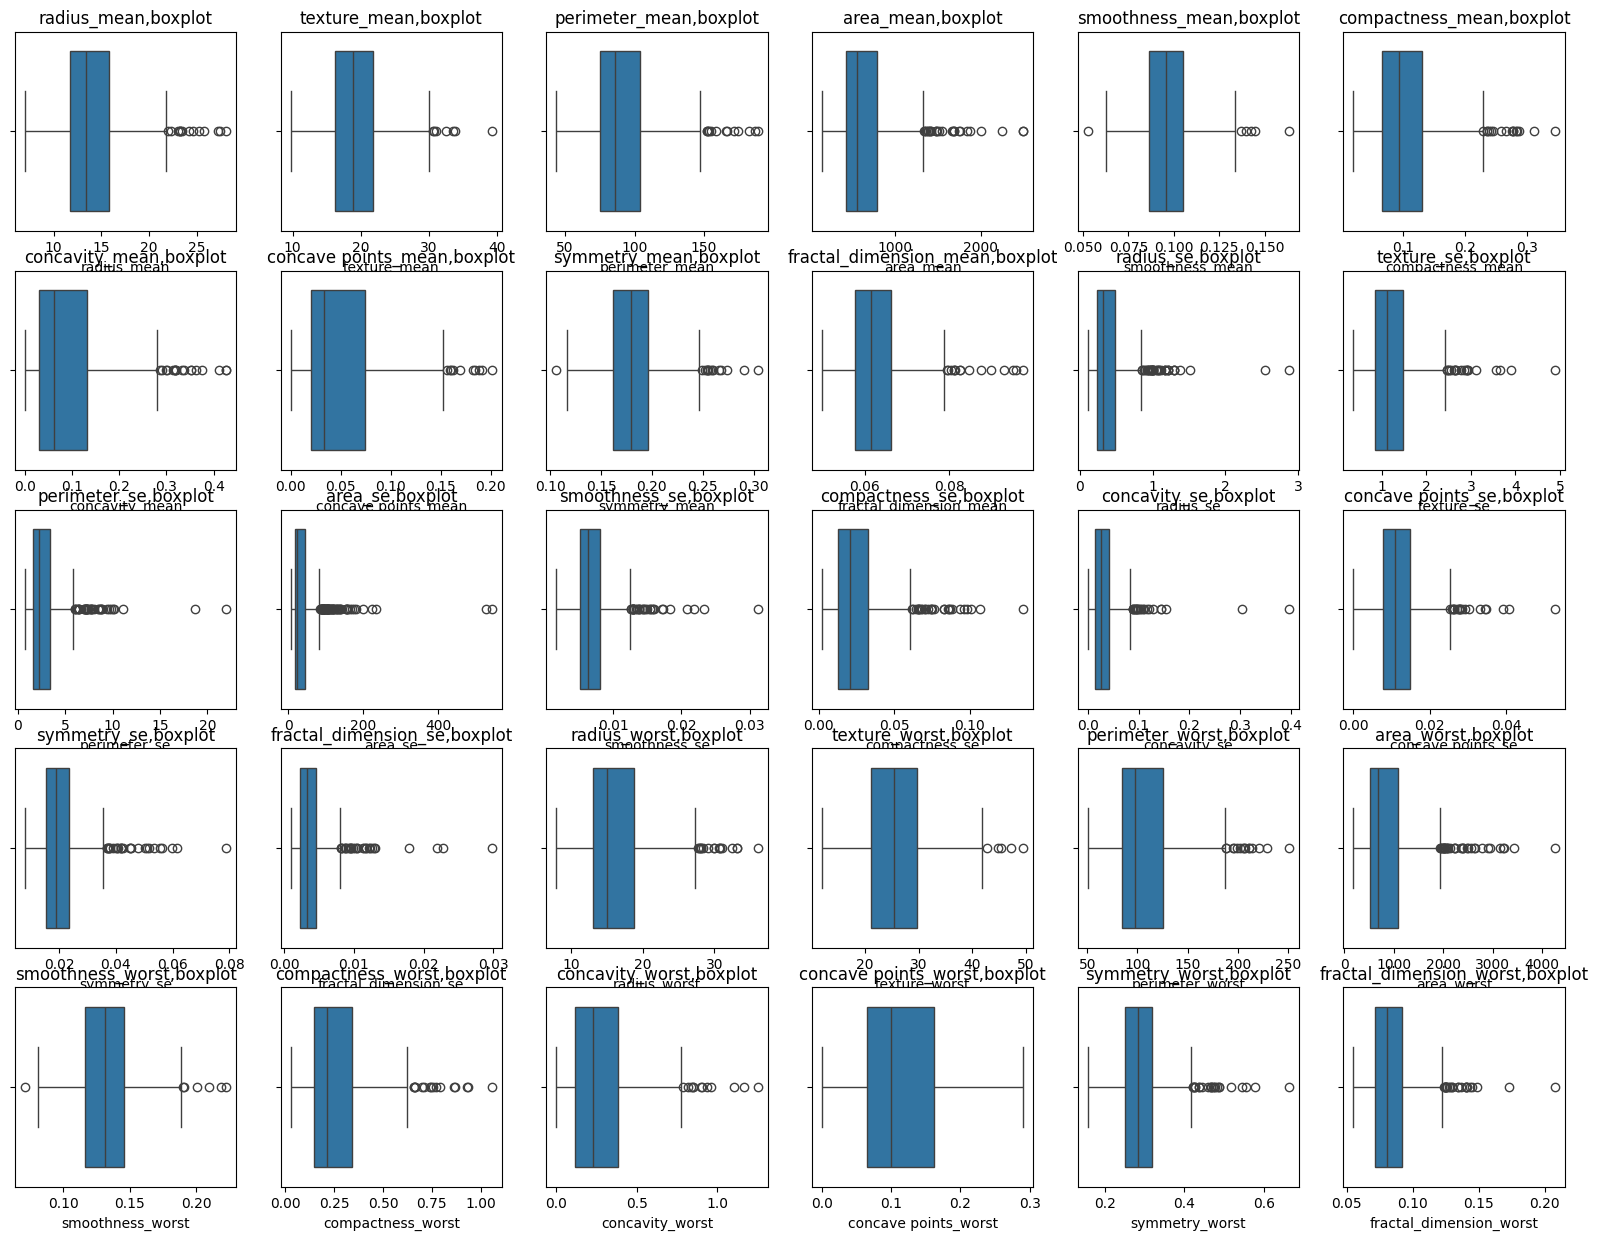

In [ ]:
num_cols=df.select_dtypes("number").columns
plt.figure(figsize=(20,15))
for i,col in enumerate(num_cols):
  plt.subplot(5,6,i+1)
  sns.boxplot(df[col],orient='h')
  plt.title(f"{col},boxplot")
  #import math

#num_cols = df.select_dtypes("number").columns
#total = len(num_cols)
#cols = 5
#rows = math.ceil(total / cols)

#plt.figure(figsize=(20, rows * 3))
#for i, col in enumerate(num_cols):
   # plt.subplot(rows, cols, i + 1)
  #  sns.boxplot(df[col], orient='h')
 #   plt.title(f"{col} Boxplot")

#plt.tight_layout()
#plt.show()
#

In [ ]:
for col in num_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  loweer_fence=Q1-1.5*IQR
  upper_fence=Q3+1.5*IQR
  Lower_outliers=df[df[col]<loweer_fence][col].values
  Upper_outliers=df[df[col]>upper_fence][col].values
  df[col].replace(Lower_outliers,loweer_fence,inplace=True)
  df[col].replace(Upper_outliers,upper_fence,inplace=True)

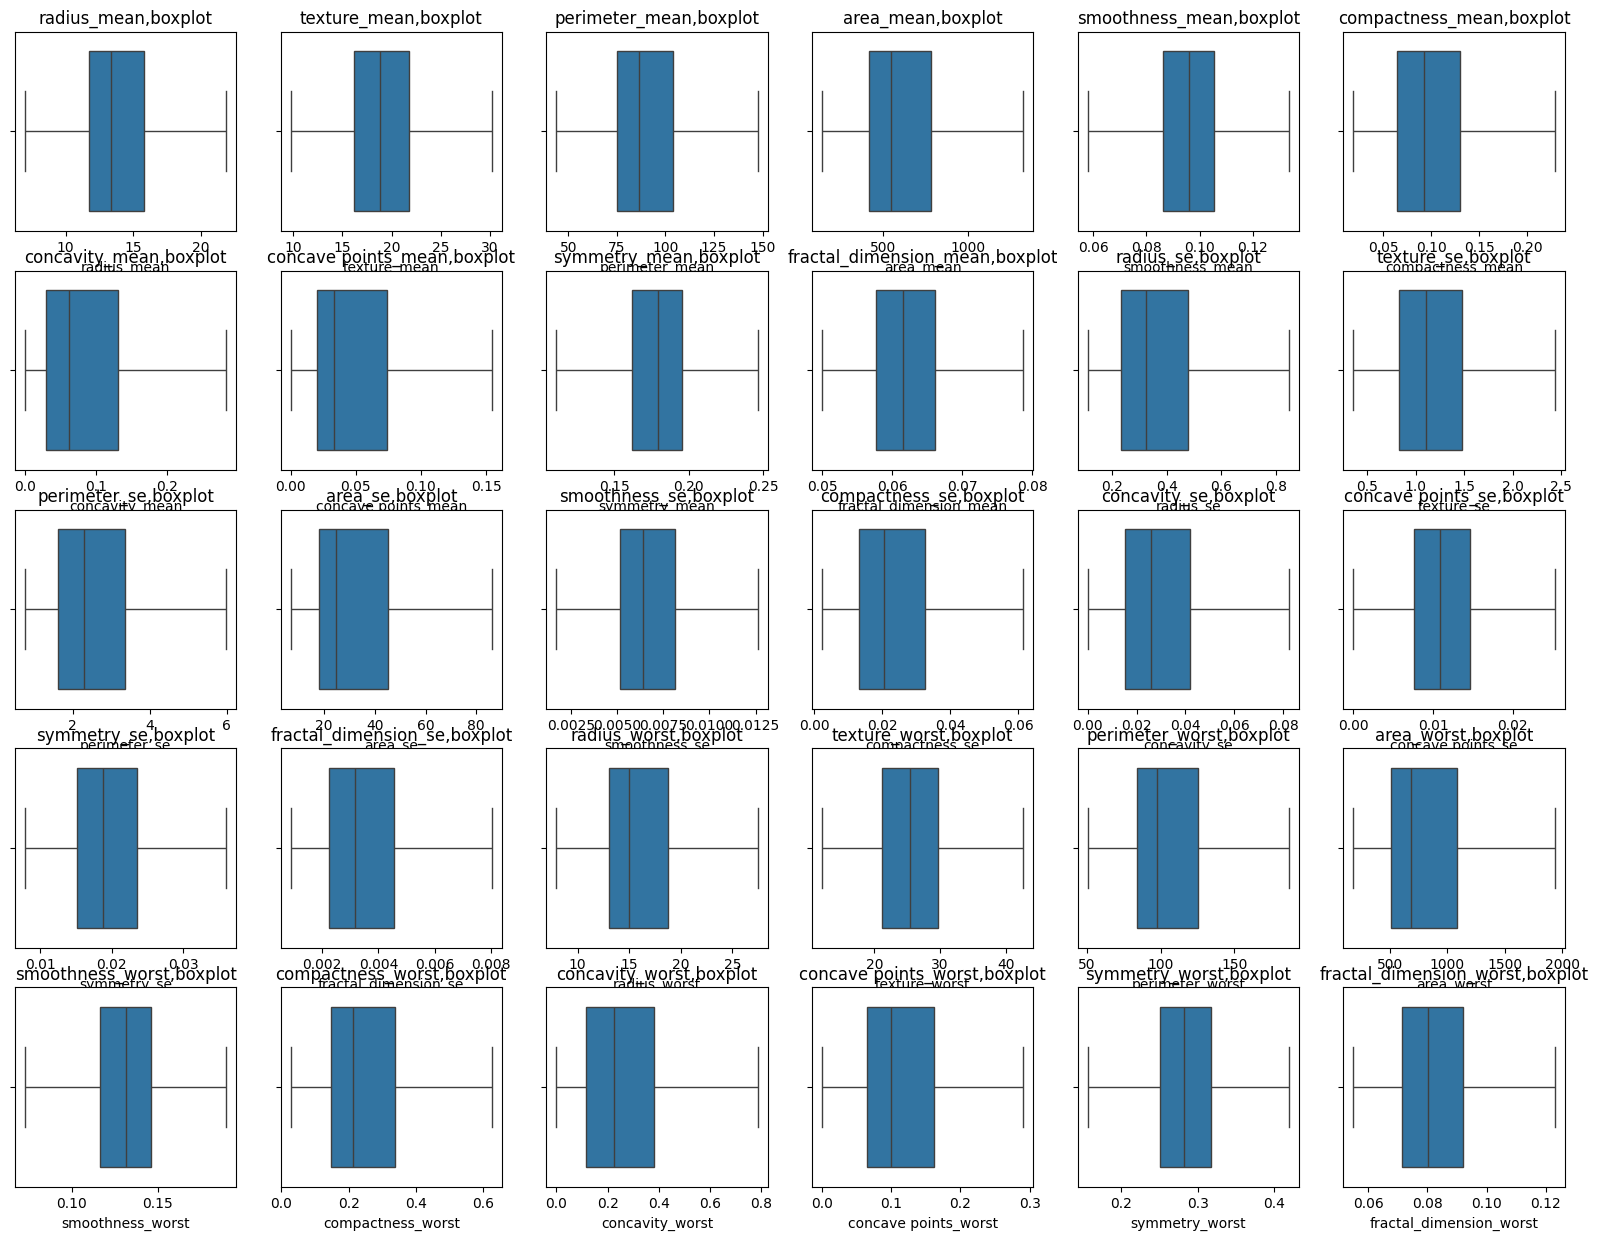

In [ ]:
num_cols=df.select_dtypes("number").columns
plt.figure(figsize=(20,15))
for i,col in enumerate(num_cols):
  plt.subplot(5,6,i+1)
  sns.boxplot(df[col],orient='h')
  plt.title(f"{col},boxplot")

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

In [ ]:
X=df.drop(columns='diagnosis')
y=df['diagnosis']

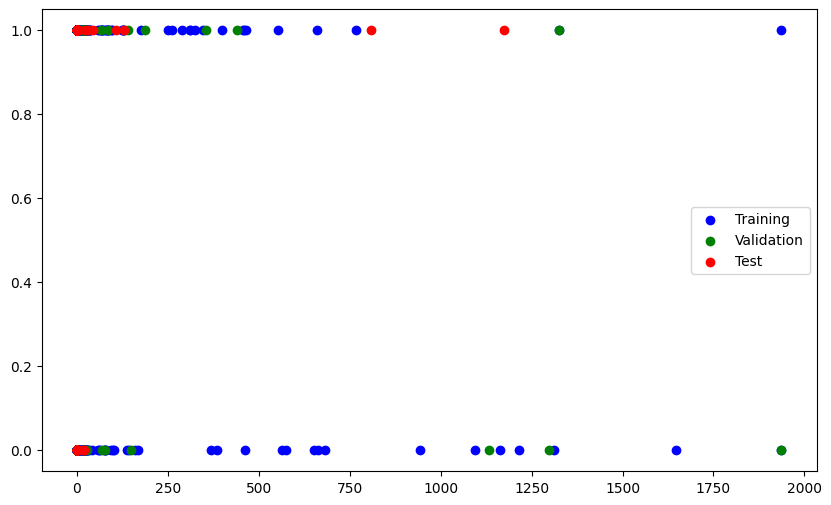

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

model =LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

X_train_flat = X_train.to_numpy().flatten()[:len(y_train)]
X_val_flat = X_val.to_numpy().flatten()[:len(y_val)]
X_test_flat = X_test.to_numpy().flatten()[:len(y_test)]
plt.figure(figsize=(10, 6))
plt.scatter(X_train_flat, y_train, color='blue', label='Training')
plt.scatter(X_val_flat, y_val, color='green', label='Validation')
plt.scatter(X_test_flat, y_test, color='red', label='Test')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on test set: {mse:.2f}')

Mean Squared Error on test set: 0.03


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
polyreg = make_pipeline(PolynomialFeatures(degree=4),LogisticRegression())
polyreg.fit(X_train, y_train)



y_test_pred_poly = polyreg.predict(X_test)
mse_poly = mean_squared_error(y_test, y_test_pred_poly)
print(f'MSE Logistic: {mse:.2f}, MSE Polynomial: {mse_poly:.2f}')

MSE Logistic: 0.03, MSE Polynomial: 0.00


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)


Accuracy: 0.9655172413793104
Mean Squared Error: 0.034482758620689655


In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred_poly = polyreg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
print(f'Logistic Model - Training MSE: {mse_train:.2f}, Test MSE: {mse:.2f}')
print(f'Polynomial Model - Training MSE: {mse_train_poly:.2f}, Test MSE: {mse_poly:.2f}')

Logistic Model - Training MSE: 0.06, Test MSE: 0.03
Polynomial Model - Training MSE: 0.05, Test MSE: 0.00


In [ ]:

ridge = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha=1.0))
lasso = make_pipeline(PolynomialFeatures(degree=4), Lasso(alpha=1.0))
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
y_test_pred_ridge = ridge.predict(X_test)
y_test_pred_lasso = lasso.predict(X_test)
print(f'MSE Polynomial: {mse_poly:.2f}, MSE Ridge: {mean_squared_error(y_test, y_test_pred_ridge):.2f}, MSE Lasso: {mean_squared_error(y_test, y_test_pred_lasso):.2f}')

MSE Polynomial: 0.00, MSE Ridge: 1.07, MSE Lasso: 0.09


In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print('Confusion Matrix:\n', cm)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Confusion Matrix:
 [[ 9  0]
 [ 1 19]]
Accuracy: 0.97
Precision: 1.00
Recall: 0.95
F1 Score: 0.97
